In [108]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [129]:
class Model(object):
    def train(self, samples, labels, steps=1): pass


class LinearModel(Model):
    def __init__(self, x_shape, y_shape, model_dir, learning_rate=0.01):
        self.W = tf.Variable([0 for _ in range(x_shape[1])], dtype=tf.float32)
        self.b = tf.Variable([0], dtype=tf.float32)
        
        self.x = tf.placeholder(tf.float32, shape=x_shape)
        self.y = tf.placeholder(tf.float32, shape=y_shape)
        self.m = tf.placeholder(tf.float32)

        self.model = self.W * self.x + self.b
        self.loss = (1 / (self.m * 2)) * tf.reduce_sum(tf.square(self.model - self.y))
        self.optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        self.minimize = self.optimizer.minimize(self.loss)
        
        self.model_dir = model_dir
    
    def train(self, samples, labels, steps=1):
        init = tf.global_variables_initializer()
        loss = []
        saver = tf.train.Saver()
        with tf.Session() as session:
            session.run(init)
            W = session.run(self.W)
            b = session.run(self.b)
            for _ in range(steps):
                t, l, W, b = session.run([self.minimize, self.loss, self.W, self.b],
                                         feed_dict={
                                             self.x: samples, 
                                             self.y: labels, 
                                             self.m: samples.shape[0]
                                         })
                loss.append(l)
            # saver.save(session, self.model_dir)
        return {'loss': loss, 'W': W, 'b': b}
    
    def predict(self, input):
        saver = tf.train.Saver()
        with tf.Session() as session:
            saver.restore(session, self.model_dir)
            return session.run([self.model], feed_dict={self.x: input})

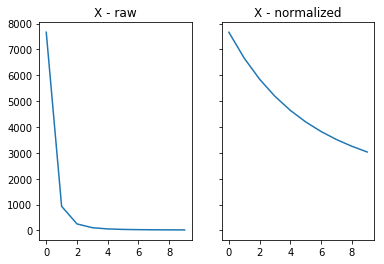

In [132]:
n = 10
X = np.array([
    [i for i in range(n)],
])
X_std = (X - np.mean(X, axis=1)) / np.std(X, axis=1)
Y = X * np.array([i for i in range(n)])
steps = 10

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)
model = LinearModel((None, n), (None, n), './sessions/model')
model_std = LinearModel((None, n), (None, n), './sessions/model_std')

res = model.train(X, Y, steps=steps)
ax1.plot(res['loss'])
ax1.set_title('X - raw')
res = model_std.train(X_std, Y, steps=steps)
ax2.plot(res['loss'])
ax2.set_title('X - normalized')

plt.show()

# print(model.predict(X))
# print(model.predict(X_std))
# print(Y)